In [0]:
!git clone https://github.com/Calvinwilson99/HackerEarth-DeepLearning.git

Cloning into 'HackerEarth-DeepLearning'...
remote: Enumerating objects: 9128, done.
remote: Total 9128 (delta 0), reused 0 (delta 0), pack-reused 9128
Receiving objects: 100% (9128/9128), 74.18 MiB | 22.53 MiB/s, done.
Resolving deltas: 100% (1927/1927), done.


In [0]:
# Import necessary header files

import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import VGG16

In [0]:
# Load test dataset and preprocess images

test = pd.read_csv("/content/HackerEarth-DeepLearning/dataset/test.csv")

X_final = []
for i in range(len(test)):
    image = cv2.imread("/content/HackerEarth-DeepLearning/dataset/Test Images/" + test.Image[i])
    resized = cv2.resize(image, (224,224))
    X_final.append(resized)

X_final = np.array(X_final)

In [0]:
# Load saved weights and VGG16 model for prediction

trained_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3), pooling='avg')
trained_model.trainable = False

pred_model = Sequential()

pred_model.add(trained_model)
pred_model.add(Dropout(0.2))
pred_model.add(Dense(4, activation = "softmax"))
pred_model.load_weights('/content/HackerEarth-DeepLearning/models/best_model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 3s 0us/step


In [0]:
# Predicting output

y_pred = pred_model.predict(X_final)


In [0]:
# Change output to text labels

y_pre = [np.argmax(i) for i in y_pred]
output = ["Attire", "Decorationandsignage", "Food", "misc"]

labels = [output[i] for i in y_pre]

Attire
0


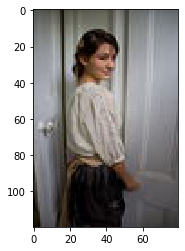

misc
3


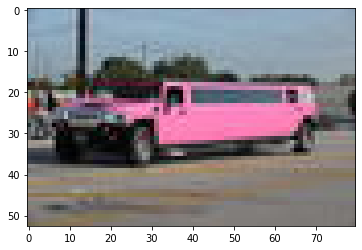

misc
3


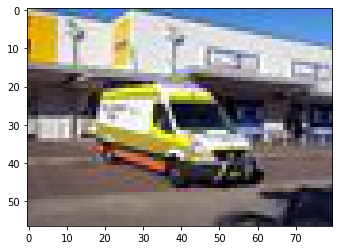

misc
3


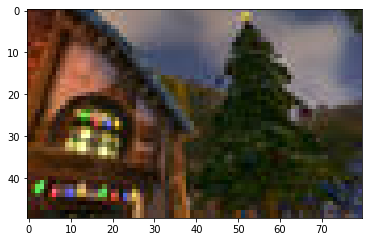

In [0]:
# Visualising the results (run cell again for different outputs)

for i in range(4):
  ind = random.randint(0, len(test))
  image = plt.imread("/content/HackerEarth-DeepLearning/dataset/Test Images/" + test.Image[ind])
  print(output[y_pre[ind]])
  print(y_pre[ind])
  plt.imshow(image)
  plt.show()